<h1><center>ETF Optimazation Portfolio Analysis</center></h1>

<h3>Introduction:</h3>

<p>In this ETF Optimization Portfolio Analysis project, the goal is to determine the optimal weights for a portfolio consisting of Exchange Traded Funds (ETFs) that represent a diverse and broad market. The popularity of ETFs has grown due to their diversification, transparency, liquidity, and lower fees, making them a preferred investment option. A group of ETFs that aim to cover the broader market with minimal holdings has been carefully selected, and using Modern Portfolio Theory, insights will be provided into the optimal weights for each ETF in the portfolio. The analysis aims to assist investors in making informed decisions about their investments by reducing risk and increasing returns.</p>

<p>The ETFs were carefully chosen to represent a diversified ETF-only portfolio. The analysis uses Modern Portfolio Theory to determine the optimal portfolio weight. To learn more about this subject, it is reccomended to read this <a href="https://www.investopedia.com/terms/m/modernportfoliotheory.asp"> Investopedia article</a> and this <a href="https://en.wikipedia.org/wiki/Modern_portfolio_theory">Wikipedia article</a>.</p>

<p>The selected ETFs attempt to cover the broader market with minimal holdings. The analysis includes one ETF for each of the following markets:
    <ul>
        <li>A large-cap U.S. ETF: <strong>SPY</strong></li>
        <li>A small-cap U.S. ETF: <strong>SLYG</strong></li>
        <li>An international developed-market ETF: <strong>VEA</strong></li>
        <li>An emerging-market ETF: <strong>VWO</strong></li>
        <li>a commodity index tracking fund: <strong>DBC</strong></li>
    </ul>
</p>

<p>
For a brief summary of each of these ETFs and their corresponding index funds, please refer to the following:    
       <ul style="list-style: none">
        <li>
            <a href="https://finance.yahoo.com/quote/SPY/"><strong>SPY</strong></a>
            : SPDR S&P 500 ETF Trust
        </li>
        <li>
            <a href="https://finance.yahoo.com/quote/SLYG?p=SLYG&.tsrc=fin-srch"><strong>SLYG</strong></a>
            : SPDR S&P 600 Small Cap Growth ETF
        </li>
        <li>
            <a href="https://finance.yahoo.com/quote/VEA?p=VEA&.tsrc=fin-srch"><strong>VEA</strong></a>
            : Vanguard Developed Markets Index Fund
        </li>
        <li>
            <a href="https://finance.yahoo.com/quote/VWO?p=VWO&.tsrc=fin-srch"><strong>VWO</strong></a>
            : Vanguard Emerging Markets Stock Index Fund
        </li>
        <li>
            <a href="https://finance.yahoo.com/quote/DBC?p=DBC&.tsrc=fin-srch"><strong>DBC</strong></a>
            : Invesco DB Commodity Index Tracking Fund
        </li>
    </ul>
</p>

<h3>Getting Started</h3>
<p>First, general imports for data analysis and visualizations are needed.</p>

In [1]:
# General imports

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy.linalg import multi_dot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas_datareader.data as web
from datetime import datetime
from __future__ import division
import yfinance as yf

<hr style="height:2px;">

<p>We begin by creating a list of ETFs and setting the start and end dates, as well as the number of years of data to base our portfolio on. It's worth noting that we are using <code>datetime.now()</code> to obtain the current market price for each asset. Therefore, each time this code is executed, the output will be different. For the purpose of this project, we will be using 1 year of data.</p>

In [2]:
# List of ETFs

etfs = ['SPY', 'SLYG', 'VEA', 'VWO', 'DBC'] #FTBFX or DBC

# Old code from (2022-6-14)
# Start and end dates, as well as how many years of data to look at

# end = datetime.now()
years = 1
# start = datetime(end.year - years, end.month, end.day)

<p>Next, we loop through the list using <code>globals()</code> to put the data into 5 Pandas DataFrames, one DataFrame for each ETF. It's important to note that we need to determine the current <code>risk_free_rate</code> in order to calculate the Sharpe Ratio.</p>
<p>For the purpose of this project, we will be setting the <code>principal</code>, or initial portfolio value, at $5000.</p>

In [3]:
# Loop through ETF list

# Old code ran on 2022-6-14

# for etf in etfs:
#     globals()[etf] = web.DataReader(name=etf, data_source='yahoo', start=start, end=end)
    
# r_f = web.DataReader(name="^TNX", data_source='yahoo', start=start, end=end)

# New code below for same dates (2022-6-14) originally ran 
# Note that Yahoo Finance API has changed and the following code must be changed to work

yf.pdr_override()

for etf in etfs:
    globals()[etf] = web.get_data_yahoo(etf, "2021-6-14", "2022-6-14")
    
r_f = web.get_data_yahoo("^TNX", '2021-6-14', '2022-6-14')

# Find latest risk free rate

risk_free_rate = r_f['Adj Close'].iloc[-1] / 100

# Set principal
principal = 5000

print("The 10 year treasury yield, otherwise known as the risk free rate, is {:.3f}%".format(risk_free_rate * 100))
print("The account principal is ${}".format(principal))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The 10 year treasury yield, otherwise known as the risk free rate, is 3.366%
The account principal is $5000


<hr style="height:2px;">

<p>Now it's time to visualize how the price has changed over $n$ <code>years</code>.</p>

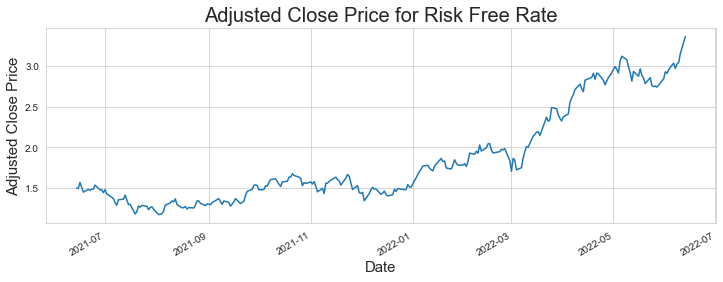

In [4]:
# Plot the 10 year treasury yield

r_f['Adj Close'].plot(figsize=(12,4))

plt.title('Adjusted Close Price for Risk Free Rate', fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price', fontsize=15)

plt.show()


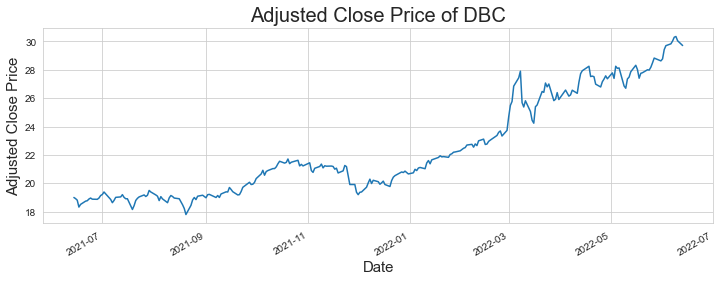

In [5]:
DBC['Adj Close'].plot(figsize=(12,4))

plt.title('Adjusted Close Price of DBC', fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price', fontsize=15)

plt.show()

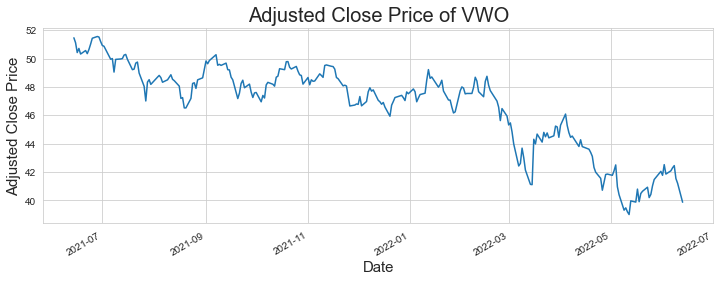

In [6]:
VWO['Adj Close'].plot(figsize=(12,4))

plt.title('Adjusted Close Price of VWO', fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price', fontsize=15)

plt.show()

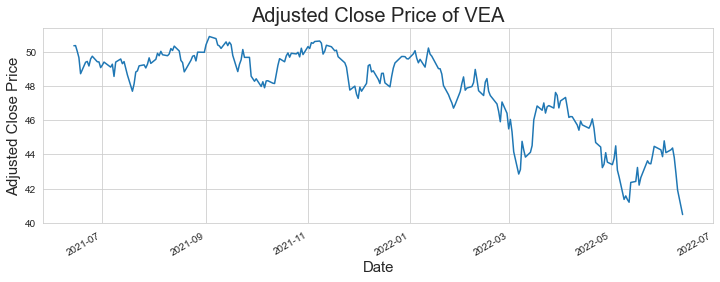

In [7]:
VEA['Adj Close'].plot(figsize=(12,4))

plt.title('Adjusted Close Price of VEA', fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price', fontsize=15)

plt.show()

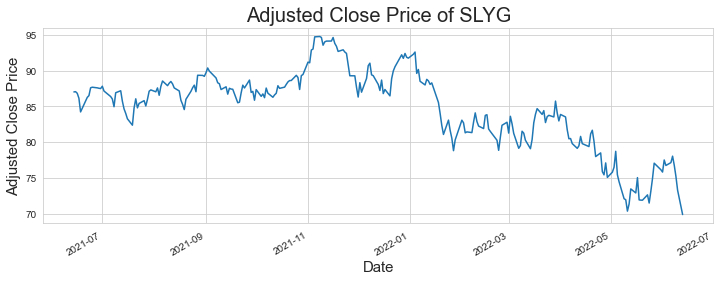

In [8]:
SLYG['Adj Close'].plot(figsize=(12,4))

plt.title('Adjusted Close Price of SLYG', fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price', fontsize=15)

plt.show()

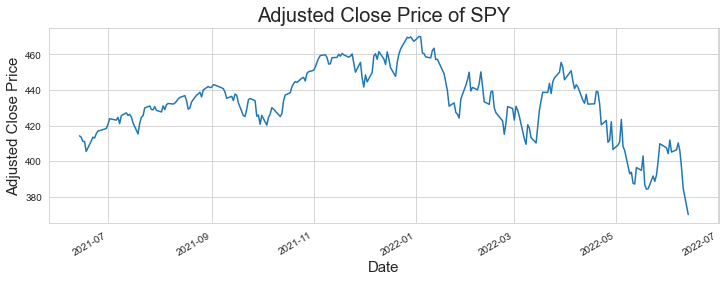

In [9]:
SPY['Adj Close'].plot(figsize=(12,4))

plt.title('Adjusted Close Price of SPY', fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price', fontsize=15)

plt.show()

<hr style="height:2px;">

<p>In order to observe the returns of the portfolio, we need to create a DataFrame using the <code style="color: rgb(186,34,32)">Adj Close</code> column of each ETF.</p>

In [10]:
# Make a new dataframe with just the adjusted close prices

# adj_close_df = web.DataReader(etfs,'yahoo',start,end)['Adj Close']
adj_close_df = web.get_data_yahoo(etfs,'2021-06-14','2022-06-14')['Adj Close']


# View recent closing prices

adj_close_df.tail()

[*********************100%***********************]  5 of 5 completed


,DBC,SLYG,SPY,VEA,VWO
Date,,,,,
2022-06-07,30.028688,78.078651,410.373901,44.370338,42.303822
2022-06-08,30.297070,76.811493,405.912262,43.815952,42.458008
2022-06-09,30.346769,75.257233,396.258484,42.901699,41.542545
2022-06-10,30.048569,73.336708,384.768738,41.909641,41.214905
2022-06-13,29.710609,69.941116,370.159760,40.479908,39.875446


<hr style="height:2px;">

<p>Now let's take a look at how the price has changed over $n$ <code>years</code> for all of the ETFs.</p>

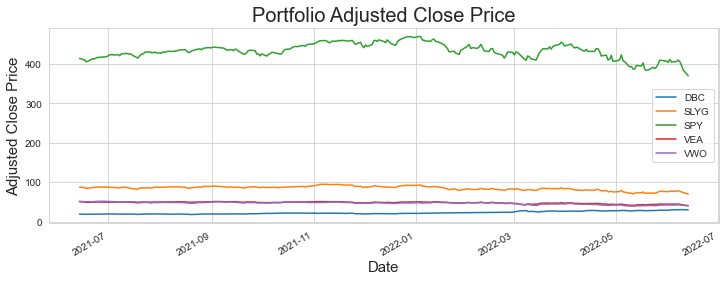

In [11]:
# Plot all adjusted close prices on one chart

adj_close_df.plot(figsize=(12,4))

plt.title('Portfolio Adjusted Close Price', fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price', fontsize=15)

plt.show()

<hr style="height:2px;">

<p>Using the <code style="color: rgb(186,34,32)">Adj Close</code> columns, we can now calculate the percentage change using <code>pct_change()</code> for the ETF prices.</p>

In [12]:
# Look at the percent change of the returns

returns_df = adj_close_df.pct_change()

returns_df

,DBC,SLYG,SPY,VEA,VWO
Date,,,,,
2021-06-14,NaN,NaN,NaN,NaN,NaN
2021-06-15,-0.004186,0.000452,-0.001834,0.000188,-0.006742
2021-06-16,-0.005780,-0.002600,-0.005583,-0.006567,-0.013576
2021-06-17,-0.025898,-0.007933,-0.000332,-0.007366,0.005765
2021-06-18,0.010309,-0.022161,-0.013491,-0.019026,-0.007766
...,...,...,...,...,...
2022-06-07,0.006664,0.011673,0.009592,0.002417,0.005037
2022-06-08,0.008937,-0.016229,-0.010872,-0.012495,0.003645
2022-06-09,0.001640,-0.020235,-0.023783,-0.020866,-0.021562


<hr style="height:2px;">

<p>Next, we will analyze the total return for each ETF over the previous $n$ <code>years</code>.</p>

In [13]:
returns_df.sum()

DBC     0.475827
SLYG   -0.190968
SPY    -0.094430
VEA    -0.203089
VWO    -0.235050
dtype: float64

<hr style="height:2px;">

<p>Given that the objective was to select a well-diversified stock portfolio, it was crucial to identify equities with a low correlation coefficient.</p>
<p>Unfortunately, these stocks seem to exhibit a relatively high correlation, despite being well-diversified options.</p>

Text(0.5, 1.0, 'Adjusted Close Price Return Correlation')

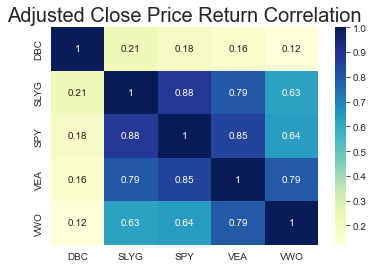

In [14]:
# See what the correlation of the returns are

sns.heatmap(returns_df.corr(),annot=True, cmap='YlGnBu')

plt.title('Adjusted Close Price Return Correlation', fontsize=20)

<hr style="height:2px;">

<p>While calculating the percent change provides insight, it is not entirely precise for our intended purpose. As we are concerned with the growth of a portfolio over time, utilizing log returns provides a more concise representation. By using log returns, we obtain a clearer depiction of the symmetric and compounded growth of our portfolio over time.</p>
<p>Accordingly, we will generate a new DataFrame, <code>log_returns_df</code>, to manage these values.</p>

In [15]:
# Now, look at the log returns

log_returns_df = np.log(adj_close_df / adj_close_df.shift(1))

log_returns_df

,DBC,SLYG,SPY,VEA,VWO
Date,,,,,
2021-06-14,NaN,NaN,NaN,NaN,NaN
2021-06-15,-0.004195,0.000452,-0.001836,0.000188,-0.006765
2021-06-16,-0.005797,-0.002603,-0.005599,-0.006588,-0.013669
2021-06-17,-0.026240,-0.007965,-0.000332,-0.007393,0.005749
2021-06-18,0.010257,-0.022410,-0.013582,-0.019209,-0.007797
...,...,...,...,...,...
2022-06-07,0.006642,0.011605,0.009546,0.002414,0.005024
2022-06-08,0.008898,-0.016362,-0.010932,-0.012573,0.003638
2022-06-09,0.001639,-0.020442,-0.024070,-0.021087,-0.021797


<hr style="height:2px;">

<p>Next, we want to calculate the mean returns of our <code>log_returns_df</code>. This will give us an idea of the average daily return of our portfolio. We will then annualize these returns by multiplying them by the number of trading days in a year (<code>252</code>).</p>

In [16]:
# Let's look at the annualized mean return

mean_returns = log_returns_df.mean() * 252

mean_returns

DBC     0.447312
SLYG   -0.218595
SPY    -0.112701
VEA    -0.218171
VWO    -0.255187
dtype: float64

<hr style="height:2px;">

<p>The code below illustrates the generation of random weights to be assigned to each asset in the portfolio. It is important to note that the sum of all weights must be equal to 1 in order to ensure a fully invested portfolio.</p>

In [17]:
# Sample random weight genorator to find Markowitz Bullet

sample_weights = np.random.random(len(etfs))
sample_weights = sample_weights/np.sum(sample_weights)

print("Randomized weights :", sample_weights)
print("Total of weights :", np.sum(sample_weights))

Randomized weights : [0.28035057 0.09538018 0.39798254 0.08043137 0.14585534]
Total of weights : 1.0


<hr style="height:2px;">
<hr style="height:2px;">

<h2><center>Constructing the Markowitz Bullet</center></h2>
<p>In this section of the notebook, we will create empty lists for the <code>portfolio_returns</code>, <code>portfolio_volatility</code>, <code>portfolio_sharpe_ratio</code>, and the <code>portfolio weights</code> to construct the Markowitz Bullet.</p>
<p>By iterating over a range of $n$ different cases, we can build $n$ different theoretical portfolios. Theoretically, we could take the past performance of these portfolios, with $n$ different weights, and choose the portfolio with the best reward-to-risk ratio.</p>
<p>We will generate $n$ random weights using the <code>NumPy.random()</code> function. Then, we will append these randomly generated weights to the aforementioned lists and finally create a <code>NumPy.array()</code> with these lists.</p>
<p>For this analysis, we have chosen 1000 iterations.</p>
<p>It is crucial to annualize everything that we compute on a daily basis from the <code>log_returns_df</code>. By annualizing <code>log_returns_df.mean() * 252</code> and <code>log_returns_df.cov() * 252</code>, we will get an average return and an average covariance coefficient on each day that we compute the data. When we multiply these values by the number of years, we can adjust this code to any time frame that we choose.</p>
<p><i>Note that there are 252 trading days in a year.</i></p>

In [18]:
# Create empty lists for all the different portfolios, Sharpe Ratios, 
# portfolio weights, returns and volatility in Markowitz Bullit

portfolio_returns = []
portfolio_volatility = []
portfolio_sharpe_ratio = []
portfolio_weights = []

# Fill lists with n different portfolios

for i in range(10000):
    portfolio_weight = np.random.random(len(etfs))
    portfolio_weight = portfolio_weight / np.sum(portfolio_weight)
    
    returns = (np.sum(portfolio_weight * log_returns_df.mean()) * 252) * years
    portfolio_returns.append(returns)
    
    volatility = np.sqrt(multi_dot([portfolio_weight.T, (log_returns_df.cov() * 252) * years, portfolio_weight]))
    portfolio_volatility.append(volatility)
    
    sharpe_ratio = (returns - risk_free_rate) / volatility
    portfolio_sharpe_ratio.append(sharpe_ratio)
    
    portfolio_weights.append(portfolio_weight)
    
# Put portfolios, Sharpe Ratio, return, volatility and weights into NumPy arrays

portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)
portfolio_sharpe_ratio = np.array(portfolio_sharpe_ratio)
portfolio_weights = np.array(portfolio_weights)

# Look at arrays that were just created

portfolio_returns, portfolio_volatility, portfolio_sharpe_ratio, portfolio_weights

(array([ 0.03107923,  0.06027631,  0.21790094, ...,  0.00307419,
        -0.050127  , -0.07824933]),
 array([0.16561713, 0.15496524, 0.17691998, ..., 0.15165554, 0.15521148,
        0.15714234]),
 array([-0.01558276,  0.17175668,  1.04138011, ..., -0.20167948,
        -0.53982477, -0.71215262]),
 array([[0.37097072, 0.33265172, 0.03773155, 0.21912533, 0.03952068],
        [0.43193939, 0.02443631, 0.02217398, 0.21538488, 0.30606543],
        [0.64436508, 0.0702771 , 0.1180408 , 0.02786145, 0.13945557],
        ...,
        [0.28932977, 0.01663654, 0.2955436 , 0.33196095, 0.06652914],
        [0.250332  , 0.04260733, 0.16331552, 0.11813111, 0.42561404],
        [0.1799292 , 0.08141926, 0.26677288, 0.25791527, 0.21396339]]))

<hr style="height:2px;">

<p>Next, we create a Pandas DataFrame to store the <code>portfolio_returns</code> and <code>portfolio_volatility</code> arrays for plotting purposes.</p>

In [19]:
# Add return and volatility into DataFrame

portfolios = pd.DataFrame({"Return": portfolio_returns, "Volatility": portfolio_volatility})

portfolios

,Return,Volatility
0,0.031079,0.165617
1,0.060276,0.154965
2,0.217901,0.176920
3,-0.085120,0.157956
4,-0.028342,0.154170
...,...,...
9995,0.005787,0.150556
9996,-0.107822,0.160757
9997,0.003074,0.151656
9998,-0.050127,0.155211


<hr style="height:2px;">

<p>In this next section, we will determine the maximum Sharpe Ratio out of the array <code>portfolio_sharpe_ratio</code> that we have generated for our theoretical portfolios. We will then add this maximum Sharpe Ratio value, along with its corresponding portfolio returns, volatility, and weights, to a new Pandas DataFrame called <code>l_s_portfolio</code>. This will enable us to visualize the portfolio with the highest reward-to-risk ratio on the Markowitz Bullet.</p>

In [20]:
# Find max and min Sharpe Ratios

largest_sharpe_ratio = np.argmax(portfolio_sharpe_ratio)
# smallest_sharpe_ratio = np.argmin(portfolio_sharpe_ratio)

# Make new DataFrames with portfolios with the highest and lowest Sharpe Ratios

l_s_portfolio = pd.DataFrame({"Volatility":portfolio_volatility[largest_sharpe_ratio], 
                              "Return":portfolio_returns[largest_sharpe_ratio]}, index=[0])

# This DataFrame/Portfolio is not needed, but I have left it in case I will need it later.
# s_s_portfolio = pd.DataFrame({"Volatility":portfolio_volatility[smallest_sharpe_ratio], 
#                              "Return":portfolio_returns[smallest_sharpe_ratio]}, index=[0])

<hr style="height:2px;">

<p>Next, we create a plot for the <code>portfolios</code> and <code>l_s_portfolio</code> we have established. Additionally, we will include a plot for the minimum risk portfolio and a line representing the current <code>risk_free_rate</code> and the Capitol Market Line.</p>

C:\Users\Lenovo user\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


<Figure size 432x288 with 0 Axes>

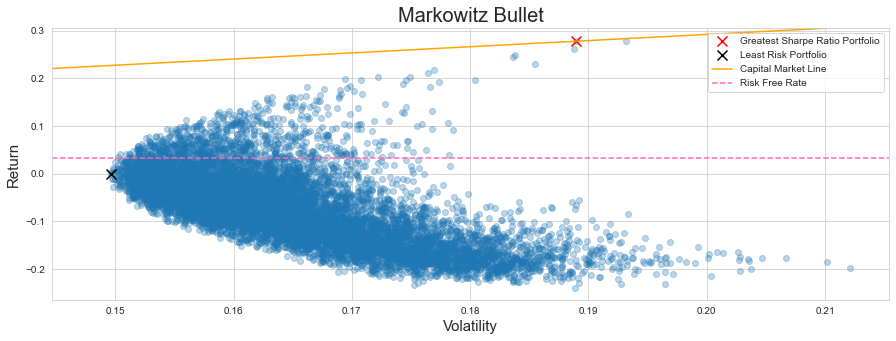

In [21]:
# ---- Plot Markowitz Bullet ---- #

fig=plt.figure()
plt.figure(figsize=(15,5))

# Plot all portfolios

plt.scatter(portfolios['Volatility'],portfolios['Return'], alpha=0.3)

# Plot portfolio with the greatest Sharpe Ratio

plt.scatter(l_s_portfolio['Volatility'],l_s_portfolio['Return'], color='r',
            marker='x', s=100, label='Greatest Sharpe Ratio Portfolio')

# Plot portfolio with the most minimal risk to return

plt.scatter(min(portfolio_volatility),
            portfolio_returns[np.where(portfolio_volatility == min(portfolio_volatility))], 
            color='k',marker='x', s=100, label="Least Risk Portfolio")

# Plot Capitol Market Line

m = (l_s_portfolio['Return'] - risk_free_rate) / (l_s_portfolio['Volatility'] - 0)
x = (max(l_s_portfolio['Volatility']) + (max(portfolio_volatility) / 5))
y = m*x + risk_free_rate

plt.plot([0, x],[risk_free_rate, y],
         color='orange', label='Capital Market Line')

# Plot the risk free rate with a horizontal line 

plt.axhline(y=risk_free_rate, color='hotpink', linestyle='--', label='Risk Free Rate')

# Focus the graph 

plt.xlim([min(portfolio_volatility) - (min(portfolio_volatility) / 30), 
          max(l_s_portfolio['Volatility']) + (max(portfolio_volatility) / 8)])
plt.ylim([min(portfolio_returns)+(min(portfolio_returns) / 10), 
          max(l_s_portfolio['Return']) + (max(l_s_portfolio['Return']) / 10)])


# Plot vertival line at x = 0
plt.axvline(x=0, color='r') # This shows the line x = 0 for perspective

# Plot axis, and legend

plt.title('Markowitz Bullet', fontsize=20)
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return',fontsize=15)
plt.legend()
plt.show()

<hr style="height:2px;">

<p>After visualizing the Markowitz Bullet, the optimal Sharpe Ratio, and the minimum risk portfolio, let's take a look at the <code>portfolio_weights</code> of these portfolios to determine the optimal asset allocation for each portfolio. Furthermore, we will print the <code>portfolio_volatility</code> and <code>portfolio_return</code> of each portfolio to evaluate their profitability.</p>

In [22]:
# Print portfolios with max and min Sharpe Ratios, as well as the portfolio weights,
# and the return and volatility of each portfolio

# First, the portfolio with max Sharpe Ratio, the assiociated weights, volatility and return

print("FOR GREATEST SHARPE RATIO PORTFOLIO:")
print("---------------------------------------")
i = 0
while i < len(etfs):
    print("ETF weight for: {}: {:.2f}% portfolio allocation".format(etfs[i], portfolio_weights[largest_sharpe_ratio][i] * 100))
    i+=1

print("Annualized Volatility: {:.2f}%".format(portfolio_volatility[largest_sharpe_ratio] * 100))

print("Annualized Return: {:.2f}%".format(portfolio_returns[largest_sharpe_ratio] * 100))

print('\n')
print("##########################################################################")
print('\n')

# Then, Portfolio with min Sharpe Ratio, the associated portfolio weights,
# volatility and return

print("FOR LOWEST VOLATILITY PORTFOLIO WITH MAXIMUM RETURN:")
print("---------------------------------------")
i = 0
while i < len(etfs):
    print("ETF weight for: {}: {:.2f}% portfolio allocation".format(etfs[i], 
                                                                portfolio_weights[np.where(portfolio_volatility == 
                                                                min(portfolio_volatility))][0][i] * 100))
    i+=1

print("Annualized Volatility: {:.2f}%".format(min(portfolio_volatility) * 100))

print("Annualized Return: {:.2f}%".format(portfolio_returns[np.where(portfolio_volatility == min(portfolio_volatility))][0] * 100))

FOR GREATEST SHARPE RATIO PORTFOLIO:
---------------------------------------
ETF weight for: SPY: 73.87% portfolio allocation
ETF weight for: SLYG: 1.26% portfolio allocation
ETF weight for: VEA: 7.25% portfolio allocation
ETF weight for: VWO: 8.81% portfolio allocation
ETF weight for: DBC: 8.80% portfolio allocation
Annualized Volatility: 18.89%
Annualized Return: 27.78%


##########################################################################


FOR LOWEST VOLATILITY PORTFOLIO WITH MAXIMUM RETURN:
---------------------------------------
ETF weight for: SPY: 32.86% portfolio allocation
ETF weight for: SLYG: 1.55% portfolio allocation
ETF weight for: VEA: 3.84% portfolio allocation
ETF weight for: VWO: 49.81% portfolio allocation
ETF weight for: DBC: 11.94% portfolio allocation
Annualized Volatility: 14.96%
Annualized Return: 0.01%


<hr style="height:2px;">

<p>As an additional step, it may be useful to visualize the weights of each maximum Sharpe Ratio and minimum risk portfolio. This can be achieved using a pie chart, providing an intuitive representation of the relative weights assigned to each asset in the portfolio.</p>

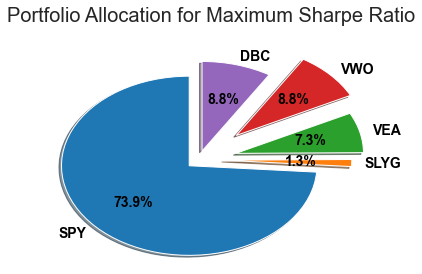

In [23]:
# Visualize weighted portfolio for the max Sharpe Ratio

labels = etfs
max_sr_weights = portfolio_weights[largest_sharpe_ratio]
explode = (0.1, 0.2, 0.3, 0.4, 0.1)  
# explode = (.5,0.5,0.5,1,0)  
fig1, ax1 = plt.subplots()
ax1.pie(max_sr_weights, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'color': 'black', "size": "14", "weight": "bold"})
plt.title("Portfolio Allocation for Maximum Sharpe Ratio", fontsize=20, y=1.1)
ax1.axis('auto')  
plt.show()

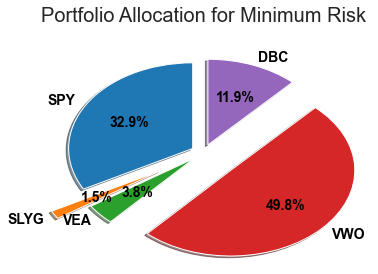

In [24]:
# Visualize weighted portfolio for the min Sharpe Ratio

min_vol_weights = portfolio_weights[np.where(portfolio_volatility == min(portfolio_volatility))][0]
explode = (0.1,.4,0.1,0.3,0.1)  

fig2, ax2 = plt.subplots()
ax2.pie(min_vol_weights, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'color': 'black', "size": "14", "weight": "bold"})
plt.title("Portfolio Allocation for Minimum Risk", fontsize=20, y=1.1)
ax2.axis('auto')  
plt.show()

<hr style="height:2px;">
<hr style="height:2px;">

<h3>Unpacking  analyzation and looking at final portfolio perfomance</h3>
<p>For this final analysis, we will look at the final allocation of the <code>principal</code> of each asset in our <code>final_df</code> DataFrame, and find the todal return for each asset with the allocated <code>principal</code>.</p>

In [25]:
# Calculate distribution of principal

weighted_sr = principal * max_sr_weights

weighted_sr

array([3693.41569544,   63.13764938,  362.63643928,  440.69378974,
        440.11642616])

In [26]:
# Show return of each asset  

log_returns_df.sum() 

DBC     0.447312
SLYG   -0.218595
SPY    -0.112701
VEA    -0.218171
VWO    -0.255187
dtype: float64

In [27]:
# Make final DataFrame with all the returns from each asset

final_df = log_returns_df.add(1).fillna(1).cumprod() * weighted_sr 
final_df

,DBC,SLYG,SPY,VEA,VWO
Date,,,,,
2021-06-14,3693.415695,63.137649,362.636439,440.693790,440.116426
2021-06-15,3677.921278,63.166203,361.970703,440.776521,437.139117
2021-06-16,3656.599769,63.001779,359.944024,437.872561,431.164080
2021-06-17,3560.651458,62.499990,359.824663,434.635459,433.642721
2021-06-18,3597.171329,61.099337,354.937394,426.286470,430.261756
...,...,...,...,...,...
2022-06-07,5673.531272,55.194876,353.182188,382.986410,354.878613
2022-06-08,5724.013148,54.291756,349.321318,378.171032,356.169700
2022-06-09,5733.395215,53.181910,340.913050,370.196718,348.406110


<hr style="height:2px;">

<p>Finally, we will examine the end results after $n$ <code>years</code> with the optimal portfolio allocation.</p>

In [28]:
# Print final results

print("Return after {} year(s), with ${} principal, would be ${:.2f}.".format(years,principal,final_df.iloc[-1].sum() - principal))

print("This would be a {:.2f}% return on your initial investment.".format(((final_df.iloc[-1].sum() - principal) / principal) * 100))

Return after 1 year(s), with $5000 principal, would be $1663.21.
This would be a 33.26% return on your initial investment.


<hr style="height:2px;">
<hr style="height:2px;">

<h2><center>Conclusion</center></h2>

<h3>Economic Conditions and Portfolio Optimization: A One-Year Analysis</h3>
<p> This paper presents an analysis of economic conditions and portfolio optimization based on one year of data. The study period ended on June 14, 2022, which was characterized by interesting economic times, including a recent declaration of the U.S. market as a bear market, declining stocks, rising commodities, and rapidly rising interest rates.</p>
<p>The risk-free interest rate plays a crucial role in computing the Sharpe Ratio and determining the optimal portfolio weights. Currently, the minimum risk portfolio has a lower return than the risk-free option, meaning that investing in Treasury bonds would yield higher returns than the minimum risk portfolio.</p>
<h3> Portfolio Optimization</h3>
<p> The portfolio optimization process involved computing the optimal portfolio weights for both the minimum risk portfolio and the maximum Sharpe Ratio portfolio based on one year of data. </p>
<h4> Minimum Risk Portfolio</h4>
<p> The weights, volatility, and return for the minimum risk portfolio are:</p>

<ul style="list-style-type:none;">
        <li>SPY: 32.86% portfolio allocation</li>
        <li>SLYG: 1.55% portfolio allocation</li>
        <li>VEA: 3.84% portfolio allocation</li>
        <li>VWO: 49.81% portfolio allocation</li>
        <li>DBC: 11.94% portfolio allocation</li>
        <li>Annualized Volatility: 14.96%</li>
        <li>Annualized Return: 0.01%</li>
</ul>

<p> The minimum risk portfolio has a slightly positive return of 0.01% and a relatively low volatility of 14.96%. </p>
<h4> Maximum Sharpe Ratio Portfolio</h4>
<p> The weights, volatility, and return for the maximum Sharpe Ratio portfolio are:</p>

<ul style="list-style-type:none;">
    <li>SPY: 73.87% portfolio allocation</li>
    <li>SLYG: 1.26% portfolio allocation</li>
    <li>VEA: 7.25% portfolio allocation</li>
    <li>VWO: 8.81% portfolio allocation</li>
    <li>DBC: 8.80% portfolio allocation</li>
    <li>Annualized Volatility: 18.89%</li>
    <li>Annualized Return: 27.78%</li>
</ul>

<p> The maximum Sharpe Ratio portfolio has a positive return of 27.78% and a higher volatility of 18.89%. </p>
<h3> Analysis </h3>
<p> Given the past year's price changes, we chose to analyze the maximum Sharpe Ratio portfolio, even though it comes with greater risk. Based on the past year's price changes, a \$5000 investment in this portfolio would yield a return of \$1663.21, which is a 33.26% return on the initial investment. Note that the final return is not annualized, which is why there is a difference in the returns.</p>
<h3> Conclusion </h3>
<p> In conclusion, this paper presents an analysis of economic conditions and portfolio optimization based on one year of data. The results show that the maximum Sharpe Ratio portfolio provides a higher return, even though it comes with greater risk. Further research can be done to explore the effects of changing economic conditions on portfolio optimization. </p>